In [1]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sn
import pandas as pd

In [2]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/*.mat')

In [3]:
fn = os.path.basename(files[1])
animal=fn.split('_')[0]
date = fn.split('_')[1]

pp=dict();
validNames = [];
for cntr in range(len(files)):
    current_file = files[cntr]
    fn = os.path.basename(current_file)
    animal=fn.split('_')[0]
    date = fn.split('_')[1]
    if animal in pp:
        datelist = pp[animal]
        
        if date in datelist:
            None
        else:
            pp[animal].append(date)
            validNames.append(current_file)
    else:
        pp[animal]=[];
        pp[animal].append(date)
        validNames.append(current_file)

In [23]:
li = pp['AA1']
'190726' in li

True

In [4]:
region_numbers = Counter()

for iF in validNames:
    dataset = lm.loadmat(iF)
    #print(iF)
    try:
        if 'anatomy' in dataset:
            anatomy = dataset['anatomy']
        else:
            continue

        if 'parent_shifted' in anatomy:
            parent = anatomy['parent_shifted']
        else:
            parent = anatomy['cluster_parent']
        idx = dataset['sp']['cgs']==2

        parent = parent[idx]
        parent = [pa if len(pa) else 'Null' for pa in parent]

        region_numbers.update(parent)
    except:
        print(iF)
        
    

Z:/giocomo/attialex/NP_DATA\AA1_190728_gaincontrast10_1.mat
Z:/giocomo/attialex/NP_DATA\npJ3_0510_baseline_playback_1.mat
Z:/giocomo/attialex/NP_DATA\npJ5_0507_baseline_1.mat
Z:/giocomo/attialex/NP_DATA\npJ5_0508_baseline_playback_1.mat


In [48]:
region_numbers

Counter({'RHP': 521,
         'hc': 340,
         'cc': 133,
         'VISp': 1114,
         'fxs': 3,
         'lfbst': 30,
         'Null': 39,
         'MBsen': 23,
         'BS': 64,
         'IC': 17,
         'cVIIIn': 5,
         'MBmot': 333,
         'SCm': 385,
         'SCs': 87,
         'RSPv': 226,
         'RSPd': 158,
         'CTXpl': 13,
         'fiber tracts': 16,
         'RSPagl': 154,
         'IIn': 5,
         'root': 1,
         'VISpm': 1,
         'PRT': 136,
         'mfbc': 2,
         'IB': 10,
         'DG': 10,
         'MEC': 12781,
         'ECT': 6296})

In [61]:
df=pd.DataFrame.from_dict(region_numbers, orient='index').reset_index()
df=df.rename(columns={'index':'Region', 0:'count'})
#sn.barplot(data=df, capsize=.1, ci="sd",palette="Blues_r")
ax = sn.countplot(x="Region", data=df)

TypeError: Cannot pass values for both `x` and `y`

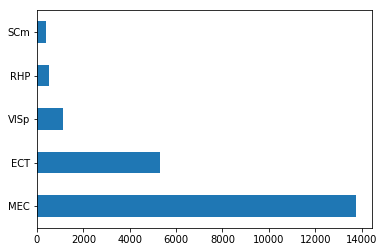

In [5]:
ff=pd.Series(region_numbers.elements())
ff.value_counts()[:5].plot('barh')

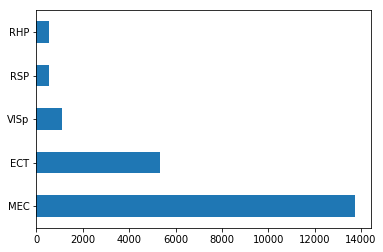

In [18]:
gg=region_numbers.elements()
gg=['RSP' if el.startswith('RS') else el for el in gg]
ff=pd.Series(gg)
ff.value_counts()[:5].plot('barh')

In [14]:
gg=region_numbers.elements()
[print(ii.startswith('RS')) for ii in gg]

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,